# Visualization of top Tech Stocks
I have analyzed and visualized the top four highest valued technology stocks, as of the end of the first half of 2021:
1. Microsoft (NASDAQ:MSFT)
2. Amazon (NASDAQ:AMZN)
3. Apple (NASDAQ:AAPL)
4. Alphabet (NASDAQ:GOOG)

I have taken a visual look into the similarities and differences between these stocks during the six month period from January through June 2021.

1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns

In [9]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the adjusting closings for top four tech stocks
Here I defined stocks, created dates and then retrieved and viewed data

In [8]:
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG'] 

#Creating dates
start_date ='2021-01-01'
end_date ='2021-07-1'

#Retriving data

stock_data = web.get_data_yahoo(symbols, start_date, end_date)

#Viewing data

stock_data

Attributes   Adj Close                                            Close  \
Symbols           MSFT        AMZN        AAPL         GOOG        MSFT   
Date                                                                      
2020-12-31  219.604477  162.846497  131.515976  1751.880005  222.419998   
2021-01-04  214.934341  159.331497  128.264984  1728.239990  217.690002   
2021-01-05  215.141708  160.925507  129.850815  1740.920044  217.899994   
2021-01-06  209.563217  156.919006  125.479843  1735.290039  212.250000   
2021-01-07  215.526749  158.108002  129.761627  1787.250000  218.289993   
...                ...         ...         ...          ...         ...   
2021-06-25  262.873474  170.072998  132.353836  2539.899902  265.019989   
2021-06-28  266.543518  172.194504  134.014359  2536.389893  268.720001   
2021-06-29  269.201843  172.406998  135.555527  2520.370117  271.399994   
2021-06-30  268.705872  172.007996  136.181976  2506.320068  270.899994   
2021-07-01  269.400208  171.648499  136.490204  2527.370117  271.600006   

Attributes                                             High              ...  \
Symbols           AMZN        AAPL         GOOG        MSFT        AMZN  ...   
Date                                                                     ...   
2020-12-31  162.846497  132.690002  1751.880005  223.000000  164.145996  ...   
2021-01-04  159.331497  129.410004  1728.239990  223.000000  163.600006  ...   
2021-01-05  160.925507  131.009995  1740.920044  218.520004  161.169006  ...   
2021-01-06  156.919006  126.599998  1735.290039  216.490005  159.875504  ...   
2021-01-07  158.108002  130.919998  1787.250000  219.339996  160.427002  ...   
...                ...         ...          ...         ...         ...  ...   
2021-06-25  170.072998  133.110001  2539.899902  267.250000  173.240997  ...   
2021-06-28  172.194504  134.779999  2536.389893  268.899994  172.399994  ...   
2021-06-29  172.406998  136.330002  2520.370117  271.649994  172.801498  ...   
2021-06-30  172.007996  136.960007  2506.320068  271.359985  173.580002  ...   
2021-07-01  171.648499  137.270004  2527.370117  271.839996  172.850006  ...   

Attributes         Low                     Open                          \
Symbols           AAPL         GOOG        MSFT        AMZN        AAPL   
Date                                                                      
2020-12-31  131.720001  1735.420044  221.699997  163.750000  134.080002   
2021-01-04  126.760002  1707.849976  222.529999  163.500000  133.520004   
2021-01-05  128.429993  1718.015015  217.259995  158.300507  128.889999   
2021-01-06  126.379997  1699.000000  212.169998  157.324005  127.720001   
2021-01-07  127.860001  1737.050049  214.039993  157.850006  128.360001   
...                ...          ...         ...         ...         ...   
2021-06-25  132.809998  2528.879883  266.230011  173.199997  133.460007   
2021-06-28  133.350006  2519.476074  266.190002  170.800003  133.410004   
2021-06-29  134.350006  2508.739990  268.869995  171.940994  134.800003   
2021-06-30  135.869995  2495.149902  270.690002  172.052994  136.169998   
2021-07-01  135.759995  2496.995117  269.609985  171.730499  136.600006   

Attributes                   Volume                                      
Symbols            GOOG        MSFT        AMZN         AAPL       GOOG  
Date                                                                     
2020-12-31  1735.420044  20942100.0  59144000.0   99116600.0  1011900.0  
2021-01-04  1757.540039  37130100.0  88228000.0  143301900.0  1901900.0  
2021-01-05  1725.000000  23823000.0  53110000.0   97664900.0  1145300.0  
2021-01-06  1702.630005  35930700.0  87896000.0  155088000.0  2602100.0  
2021-01-07  1740.060059  27694500.0  70290000.0  109578200.0  2265000.0  
...                 ...         ...         ...          ...        ...  
2021-06-25  2539.139893  25611100.0  78820000.0   70783700.0  1674200.0  
2021-06-28  2540.000000  19590000.0  

In [11]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,AAPL,GOOG
Date,,,,
2020-12-31,219.604477,162.846497,131.515976,1751.880005
2021-01-04,214.934341,159.331497,128.264984,1728.239990
2021-01-05,215.141708,160.925507,129.850815,1740.920044
2021-01-06,209.563217,156.919006,125.479843,1735.290039
2021-01-07,215.526749,158.108002,129.761627,1787.250000
...,...,...,...,...
2021-06-25,262.873474,170.072998,132.353836,2539.899902
2021-06-28,266.543518,172.194504,134.014359,2536.389893
2021-06-29,269.201843,172.406998,135.555527,2520.370117


### Plot the adjusted closing prices over time

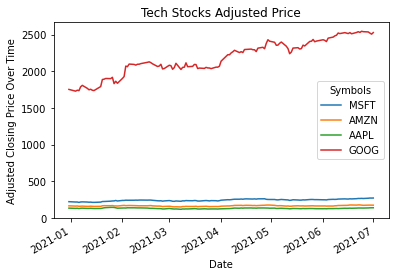

In [12]:
adj_date = stock_data["Adj Close"]
adj_date.plot()
plt.title("Tech Stocks Adjusted Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.show()

### Calculate and plot the daily simple rate of return over time
Plot showing the daily simple rate of return for each tech stock over time

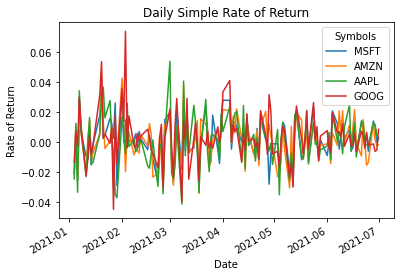

In [13]:
daily_return = adj_date.pct_change()

daily_return.plot()
plt.title("Daily Simple Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return")
plt.show()

In [14]:
daily_return.head()

Symbols,MSFT,AMZN,AAPL,GOOG
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-01-04,-0.021266,-0.021585,-0.024719,-0.013494
2021-01-05,0.000965,0.010004,0.012364,0.007337
2021-01-06,-0.025929,-0.024897,-0.033661,-0.003234
2021-01-07,0.028457,0.007577,0.034123,0.029943


### Subplots of daily simple rate of return

Text(0, 0.5, 'Daily Return')

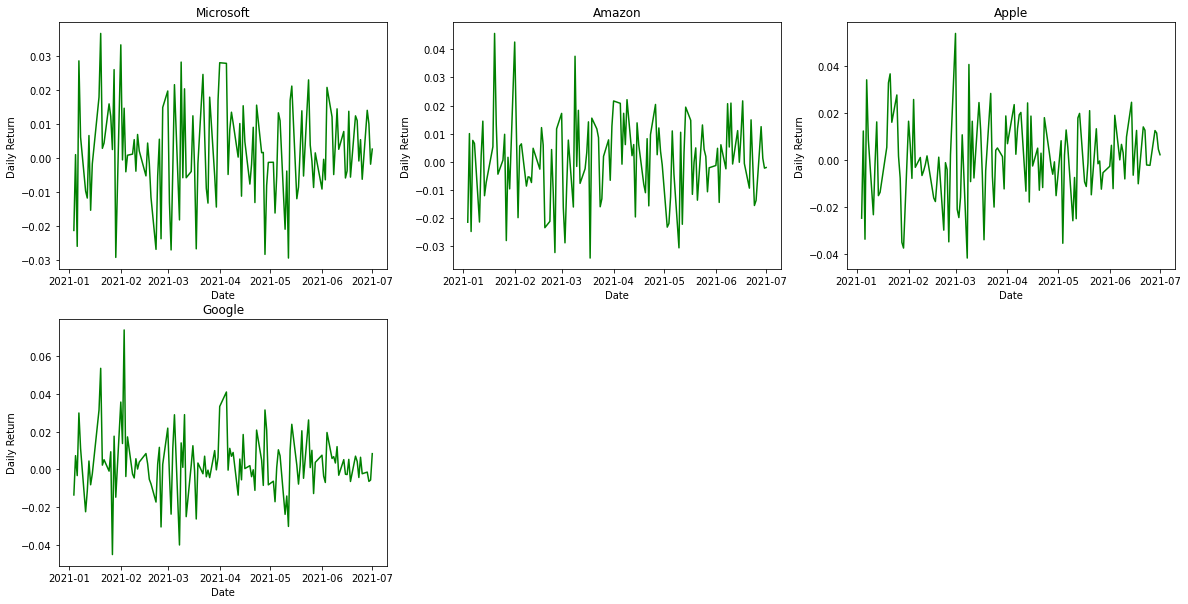

In [15]:
fig = plt.figure(figsize=(20, 10))


#Microsoft
ax1 = plt.subplot(2, 3, 1)
plt.plot(daily_return['MSFT'], color='green')
plt.title('Microsoft')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Amazon
ax2 = plt.subplot(2, 3, 2)
plt.plot(daily_return['AMZN'], color='green')
plt.title('Amazon')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Apple
ax3 = plt.subplot(2, 3, 3)
plt.plot(daily_return['AAPL'], color='green')
plt.title('Apple')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Google
ax4 = plt.subplot(2, 3, 4)
plt.plot(daily_return['GOOG'], color='green')
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Daily Return')

### Mean of each tech stock's daily simple rate of return
Created a bar chart comparing the mean daily simple rate of return for each stock.

In [17]:
mean_daily_return = daily_return.mean()
print(mean_daily_return)

Symbols
MSFT    0.001733
AMZN    0.000530
AAPL    0.000447
GOOG    0.003071
dtype: float64


Alphabet has the highest mean daily simple rate of return over the period of data collected. Thus Alphabet would have been a good choice for investment over this period of time. Apple, on the other hand, has the lowest mean simple rate of return over the period.

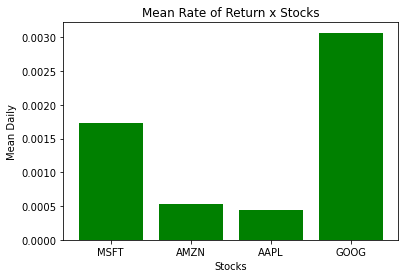

In [18]:
#Plotting bar chart

ax5 = plt.subplot()
ax5.set_xticks(range(len(symbols)))
ax5.set_xticklabels(symbols)

plt.bar(range(len(symbols)), mean_daily_return, color = 'green')

plt.xlabel('Stocks')
plt.ylabel('Mean Daily')
plt.title('Mean Rate of Return x Stocks')

plt.show()

### Plotting variance

In [19]:
#Calculating the variance of the daily simple rate of return.

variance_daily_return = daily_return.var()
print(variance_daily_return)

Symbols
MSFT    0.000196
AMZN    0.000219
AAPL    0.000302
GOOG    0.000273
dtype: float64


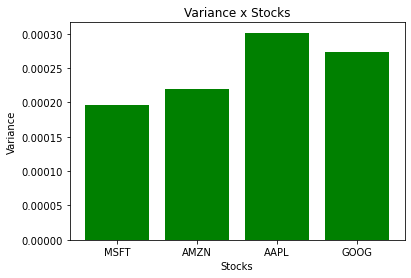

In [20]:
#Plotting bar chart
ax6 = plt.subplot()
ax6.set_xticks(range(len(symbols)))
ax6.set_xticklabels(symbols)

plt.bar(range(len(symbols)), variance_daily_return, color = 'green')

plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title('Variance x Stocks')

plt.show()


Apple shows the highest variance of all the stocks, indicating it can be a riskier investment. Microsoft shows the lowest variance, indicating that the returns are more predictable. This does not go along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

The choice depends on your investment preferences. Apple is the most volatile stock, as it has the largest standard deviation. However, it has the lowest mean return. Google is also a largely volatile stock. However, it has the largest daily mean return. If you are a more risky investor, Google could be your stock of choice. 

### Analysing correlations

In [21]:
#Calculating Correlation

correlation= daily_return.corr()
print(correlation)

Symbols      MSFT      AMZN      AAPL      GOOG
Symbols                                        
MSFT     1.000000  0.697533  0.726221  0.671729
AMZN     0.697533  1.000000  0.672496  0.610772
AAPL     0.726221  0.672496  1.000000  0.547292
GOOG     0.671729  0.610772  0.547292  1.000000


Therefore, none of the stocks are negatively correlated. Microsoft and Apple are highly correlated, while Google and Apple exhibit the lowest correlation.